在图像处理中，Thresholding中文翻译过来叫二值化或者阈值化。二值化就是把图片传换成只有white和black这两种颜色。通过Thresholding，可以让图片中感兴趣的颜色变成主角--white，其余的颜色全部隐藏--black。另外，二值化后的图片也便于计算机进行分析，因为边缘轮廓十分清晰，所以计算机可以轻松找到边界线。然而，在找边界这方面，Thresholding并不是特别好的算法，有些时候遇到某些特殊图片效果也不好。

In [1]:
from imutils import *

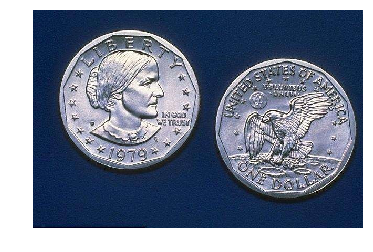

In [2]:
image = imread('image/coins.jpg')
show(image)

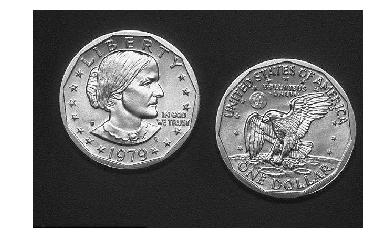

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.axis('off')
plt.show()

• cv2.THRESH_BINARY  
• cv2.THRESH_BINARY_INV  
• cv2.THRESH_TRUNC  
• cv2.THRESH_TOZERO  
• cv2.THRESH_TOZERO_INV  
<center><img src="image/threshold.png" alt="FAO" width="300"></center>

In [4]:
ret1,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret3,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret4,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret5,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)

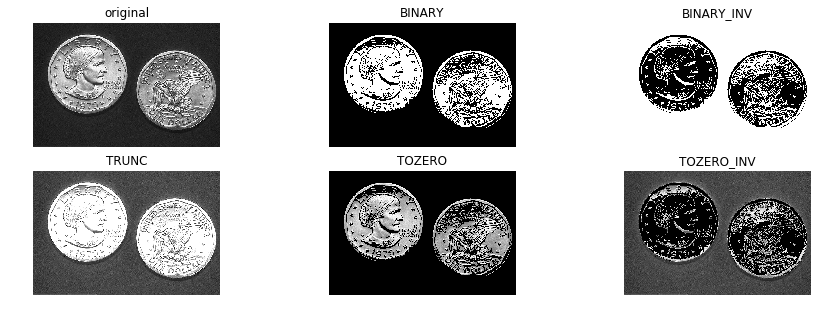

In [5]:
titles = ['original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

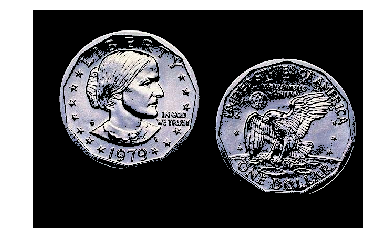

In [6]:
show(cv2.bitwise_and(image, image, mask=thresh1))

### Otsu’s Method
自动选择阈值

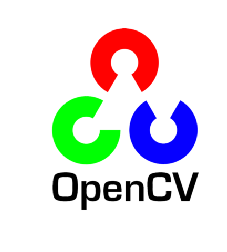

In [7]:
image = imread('image/opencv_logo.png')
show(image)

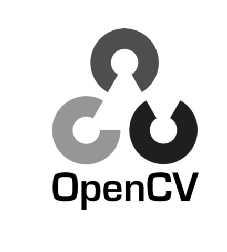

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.axis('off')
plt.show()

In [9]:
ret1,thresh1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
ret2,thresh2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print('ret1:',ret1)
print('ret2:',ret2)

ret1: 164.0
ret2: 164.0


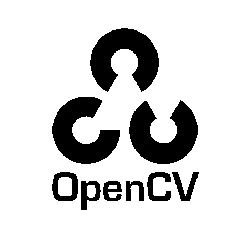

In [10]:
plt.imshow(thresh1,'gray')
plt.axis('off')
plt.show()

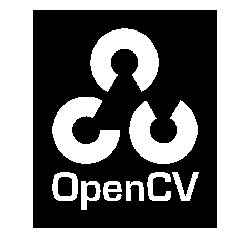

In [11]:
plt.imshow(thresh2,'gray')
plt.axis('off')
plt.show()

### Adaptive Thresholding自适应阈值
在前面的部分我们使用是全局阈值，整幅图像采用同一个数作为阈值。当
时这种方法并不适应与所有情况，尤其是当同一幅图像上的不同部分的具有不
同亮度时。这种情况下我们需要采用自适应阈值。此时的阈值是根据图像上的
每一个小区域计算与其对应的阈值。因此在同一幅图像上的不同区域采用的是
不同的阈值，从而使我们能在亮度不同的情况下得到更好的结果。

Adaptive Method- 指定计算阈值的方法。  
– cv2.ADPTIVE_THRESH_MEAN_C：阈值取自相邻区域的平
均值  
– cv2.ADPTIVE_THRESH_GAUSSIAN_C：阈值取值相邻区域
的加权和，权重为一个高斯窗口。  
• Block Size - 邻域大小（用来计算阈值的区域大小）。  
• C - 这就是是一个常数，阈值就等于平均值或者加权平均值减去这个常
数。

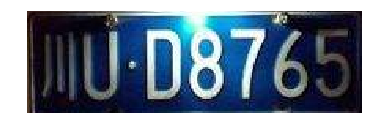

In [12]:
image = imread('image/license_plate.png')
show(image)

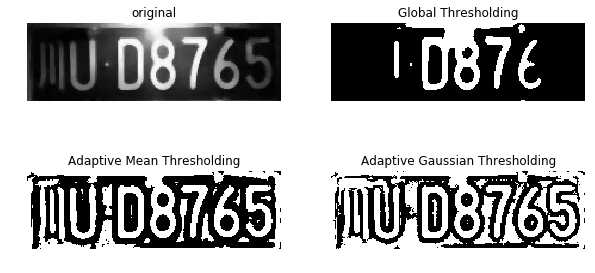

In [13]:
# 变灰度图
image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# 中值滤波
image = cv2.medianBlur(image,5)
# 普通二值化
ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
# 平均值阈值
th2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,3)
# 高斯阈值
th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3)
titles = ['original', 'Global Thresholding', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, th1, th2, th3]
plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.axis('off')
    plt.title(titles[i])
plt.show()

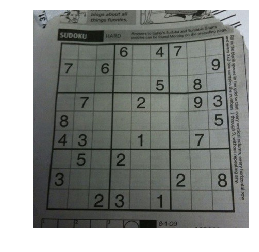

In [14]:
image = imread('image/sudoku.jpg')
show(image)

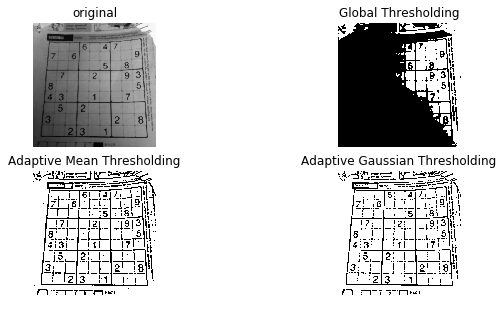

In [15]:
# 变灰度图
image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# 中值滤波
image = cv2.medianBlur(image,5)
# 普通二值化
ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
# 平均值阈值
th2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,3)
# 高斯阈值
th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3)
titles = ['original', 'Global Thresholding', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, th1, th2, th3]
plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.axis('off')
    plt.title(titles[i])
plt.show()